In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy
%matplotlib inline

In [2]:
# Enable plot theming
import matplotlib.style as style
# print(style.available)

In [3]:
# Set plot theme
style.use('seaborn-deep')

In [19]:
# Read to dataframe
df = pd.read_csv("out.csv")

# Group by monthly income
grouped_income = df.groupby('monthly_income')

# Set order of x-axis
order = ['0 - 3000', '3000 - 6000','6000 - 9000','9000 - 12000', '12000 - 15000','> 15000']

print("Total number of samples:\n{}".format(df.count()))
grouped_income.describe()

Total number of samples:
monthly_income    235
cgpa              235
school            235
dtype: int64


cgpa                                                      
               count      mean       std   min     25%   50%     75%   max
monthly_income                                                            
0 - 3000        20.0  3.399000  0.500325  2.50  3.0000  3.48  3.7750  4.20
12000 - 15000    6.0  3.233333  0.338625  2.80  3.0500  3.25  3.3000  3.80
3000 - 6000     56.0  3.397857  0.348684  2.50  3.1900  3.44  3.6525  4.00
6000 - 9000     53.0  3.241132  0.375657  2.60  2.9700  3.20  3.5500  3.99
9000 - 12000    52.0  3.255192  0.360580  2.40  3.0000  3.30  3.4925  4.00
> 15000         48.0  3.339583  0.484012  2.48  2.9625  3.30  3.7775  4.21

In [20]:
# Group by school
grouped_by_school = df.groupby('school')
grouped_by_school.describe()

cgpa                                                  \
                    count      mean       std   min    25%    50%     75%   
school                                                                      
Accountancy          35.0  3.279429  0.380827  2.68  2.945  3.400  3.6050   
Business             43.0  3.430698  0.340164  2.71  3.200  3.450  3.6350   
Economics            35.0  3.317714  0.401469  2.40  3.025  3.360  3.6200   
Information Systems  40.0  3.244750  0.453934  2.50  2.935  3.185  3.4725   
Law                  41.0  3.238780  0.423994  2.60  2.860  3.300  3.4900   
Social Sciences      41.0  3.366098  0.400162  2.48  3.100  3.360  3.6900   

                           
                      max  
school                     
Accountancy          4.00  
Business             4.20  
Economics            4.00  
Information Systems  4.12  
Law                  4.21  
Social Sciences      4.10

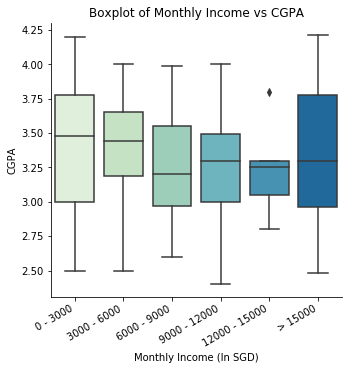

In [21]:
## Visualise
# Box plot
with sns.color_palette("GnBu"):
    box_plot = sns.catplot(
        data=df,
        x="monthly_income", 
        y="cgpa", 
        kind="box", 
        order=order,
    )
    box_plot.set(
        xlabel='Monthly Income (In SGD)', 
        ylabel='CGPA', 
        title='Boxplot of Monthly Income vs CGPA'
    )
    box_plot = box_plot.fig.autofmt_xdate() # tilt the x-axis values so they don't overlap

In [22]:
## Get statistical values
#    ols <=> Ordinary Least Squares regression 
# Syntax ==> ols('dependentVar ~ independentVar')
mod = ols('cgpa ~ monthly_income', data=df).fit()     
print(str(mod.summary()))

# with open('Ordinary Least Squares regression.txt', 'w+') as file:
#     file.write(str(mod.summary()))

                            OLS Regression Results                            
Dep. Variable:                   cgpa   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.324
Date:                Mon, 12 Nov 2018   Prob (F-statistic):              0.255
Time:                        18:26:56   Log-Likelihood:                -116.22
No. Observations:                 235   AIC:                             244.4
Df Residuals:                     229   BIC:                             265.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [23]:
# ANOVA
aov_table = sm.stats.anova_lm(mod, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
monthly_income,5.0,1.069796,0.213959,1.324374,0.254592
Residual,229.0,36.996078,0.161555,NaN,NaN


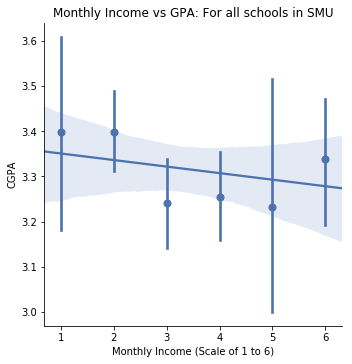

In [24]:
# Use dummy variables to make a scale of 1 - 6 for monthly_income
dfd = pd.read_csv('out_dummy.csv')

# Collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval of 95
plot_all = sns.lmplot(
    data=dfd,
    x="monthly_income", 
    y="cgpa", 
    x_estimator=np.mean, 
    ci=95
)
plot_all.set(
    title='Monthly Income vs GPA: For all schools in SMU',
    xlabel='Monthly Income (Scale of 1 to 6)', 
    ylabel='CGPA',
    xticks=range(1, 7)
)

# plot_mean = sns.lmplot(
#     data=dfd,
#     x="monthly_income", 
#     y="cgpa", 
#     x_estimator=np.mean, 
#     ci=95,
#     col='school',
#     hue='school'
# )
# # plot_mean = sns.jointplot(x="monthly_income", y="cgpa", data=dfd, kind="reg", x_estimator=np.mean)
# plot_mean.set(
#     xlabel='Monthly Income (Scale of 1 to 6)', 
#     ylabel='CGPA',
#     xticks=range(1, 7)
# )

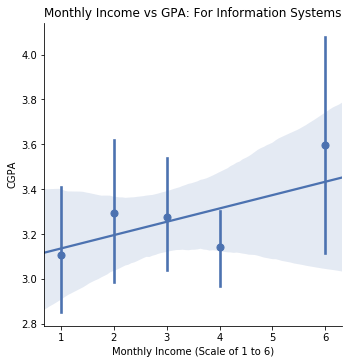

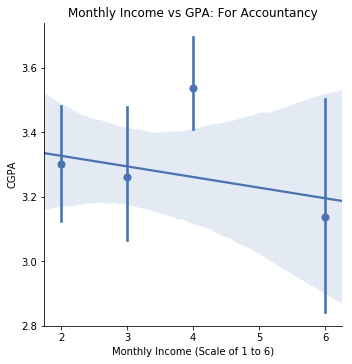

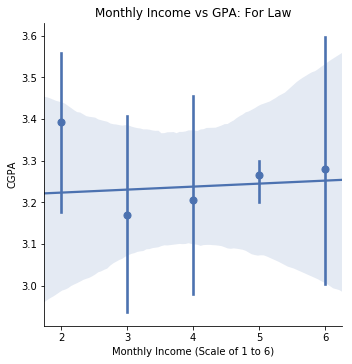

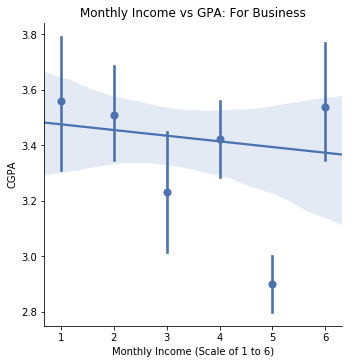

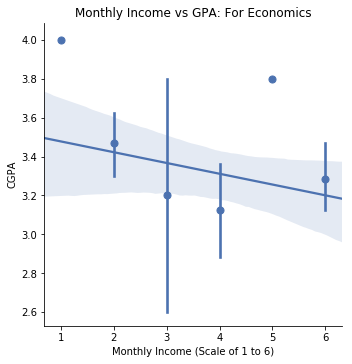

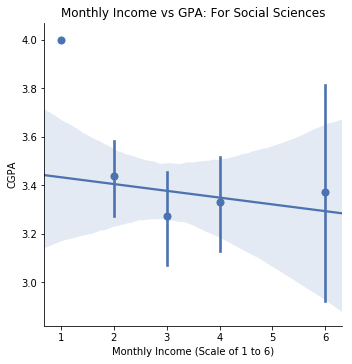

In [25]:
school = dfd['school']
IS = dfd[school == 'Information Systems']
ACC = dfd[school == 'Accountancy']
LAW = dfd[school == 'Law']
BIZ = dfd[school == 'Business']
ECN = dfd[school == 'Economics']
SOC = dfd[school == 'Social Sciences']

school_lst = [
    (IS, "Information Systems"), 
    (ACC, "Accountancy"), 
    (LAW, "Law"), 
    (BIZ, "Business"), 
    (ECN, "Economics"), 
    (SOC, "Social Sciences")
]


for tup in school_lst:
    plot_mean = sns.lmplot(
        x="monthly_income", 
        y="cgpa", 
        data=tup[0], 
        x_estimator=np.mean, 
        ci=95
    )
    plot_mean.set(
        title="Monthly Income vs GPA: For " + tup[1], 
        xlabel='Monthly Income (Scale of 1 to 6)', 
        ylabel='CGPA'
    )

In [ ]:
"""
Some comments:

Didn't have enough data on the 5th income bracket. 
Certain outliers skewed the data.
"""

In [ ]:
## Stuff that didn't work

# One-way ANOVA
# n = grouped.size()[0]
# N = len(df.values)
# k = len(pd.unique(df.group)) # this line is the culprit

# SSbetween = (sum(df.groupby('mthly-income').sum()['cgpa']**2)/n) - (df['cgpa'].sum()**2)/N
# print(SSbetween)

# sum_y_squared = sum([value**2 for value in df['cgpa'].values])
# SSwithin = sum_y_squared - sum(df.groupby('mthly-income').sum()['cgpa']**2)/n
# print(SSwithin)


# SStotal = sum_y_squared - (df['cgpa'].sum()**2)/N
# print(SStotal)

# DFbetween = k - 1
# DFwithin = N - k
# DFtotal = N - 1



# too lengthy
# def polyfit(x, y, degree):
#     results = {}

#     coeffs = np.polyfit(x, y, degree)

#      # Polynomial Coefficients
#     results['polynomial'] = coeffs.tolist()

#     # r-squared
#     p = np.poly1d(coeffs)
    
#     # Fit values and mean
#     yhat = p(x)                      # or [p(z) for z in x]
#     ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
#     ssreg = np.sum((yhat-ybar)**2)   # or sum([(yihat - ybar)**2 for yihat in yhat])
#     sstot = np.sum((y - ybar)**2)    # or sum([(yi - ybar)**2 for yi in y])
#     results['determination'] = (ssreg / sstot)
#     results['correlation'] = (ssreg / sstot)**(0.5)

#     return results
# print(polyfit(income, gpa, 1))



# not useful for this case
# # Scatter plot
# scatter_plot = sns.catplot(x="monthly_income", y="cgpa", hue='school', order=order, data=df)
# scatter_plot.set(xlabel='Monthly Income (In SGD)', ylabel='CGPA')
# scatter_plot = scatter_plot.fig.autofmt_xdate()
# plt.show()